In [1]:
#Import the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
import seaborn as sns
import textwrap
max_width = 25
width = 0.25

In [2]:
pd.set_option('display.max_colwidth', 20000)
out_put_path = r'../datasets/baseline/output/'

In [3]:
#Use os and sys to setup a relative path to the current working directory in order to make python modules import easier.
import os
import sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '..', 'utils'))

In [4]:
#functions is a module from the utils package. It gathers all the utility functions to perferm aggregation on columns.
from functions import *

In [5]:
students_df = pd.read_csv(out_put_path + 'students_clean.csv', encoding="utf-8")
s_df = students_df.copy()
s_df_f = s_df[s_df['Sex']=='Female']
s_df_m = s_df[s_df['Sex']=='Male']

fishers_df = pd.read_csv(out_put_path + 'fihsers_clean.csv', encoding="utf-8")
fi_df = fishers_df.copy()
fi_df_f = fi_df[fi_df['Sex']=='Female']
fi_df_m = fi_df[fi_df['Sex']=='Male']

farmers_df = pd.read_csv(out_put_path + 'farmers_clean.csv', encoding="utf-8")
fa_df = farmers_df.copy()

fa_df_f = fa_df[fa_df['Sex']=='Female']
fa_df_m = fa_df[fa_df['Sex']=='Male']

In [6]:
print(students_df.shape)
print(s_df_f.shape)
print(s_df_m.shape)

(157, 32)
(92, 32)
(65, 32)


In [7]:
#fa_df_f.head(21)

In [8]:
print(fishers_df.shape)
print(fi_df_f.shape)
print(fi_df_m.shape)

(44, 28)
(2, 28)
(42, 28)


In [9]:
print(farmers_df.shape)
print(fa_df_f.shape)
print(fa_df_m.shape)

(111, 34)
(21, 34)
(89, 34)


In [10]:
s_ages_df_m = count_freq_simple_answer(s_df_m, 'Age interval')
s_ages_df_f = count_freq_simple_answer(s_df_f, 'Age interval')
s_ages_df = None

if s_ages_df_m.shape[0] >= s_ages_df_f.shape[0]:  
    s_ages_df = merge_match_size(s_ages_df_m, s_ages_df_f, 'response').sort_values(by='response')
    s_men_ages_values = list(s_ages_df["frequency_x"])
    s_women_ages_values = list(s_ages_df["frequency_y"])
else:
    s_ages_df = merge_match_size(s_ages_df_f, s_ages_df_m, 'response').sort_values(by='response')
    s_women_ages_values = list(s_ages_df["frequency_x"])
    s_men_ages_values = list(s_ages_df["frequency_y"])
    
s_ages_interval = list(s_ages_df["response"])

In [11]:
s_ages_df

,response,frequency_x,frequency_y
2,From 12 to 15,20,35
1,From 15 to 20,33,34
3,Greater than 20,4,4
0,Less than 12,8,19


In [12]:
fi_ages_df_m = count_freq_simple_answer(fi_df_m, 'Age interval')
fi_ages_df_f = count_freq_simple_answer(fi_df_f, 'Age interval')
fi_ages_df = None

if fi_ages_df_m.shape[0] >= fi_ages_df_f.shape[0]:  
    fi_ages_df = merge_match_size(fi_ages_df_m, fi_ages_df_f, 'response').sort_values(by='response')
    fi_men_ages_values = list(fi_ages_df["frequency_x"])
    fi_women_ages_values = list(fi_ages_df["frequency_y"])
else:
    fi_ages_df = merge_match_size(fi_ages_df_f, fi_ages_df_m, 'response').sort_values(by='response')
    fi_women_ages_values = list(fi_ages_df["frequency_x"])
    fi_men_ages_values = list(fi_ages_df["frequency_y"])
    
fi_ages_interval = list(fi_ages_df["response"])

In [13]:
fi_ages_df

,response,frequency_x,frequency_y
3,From 25 to 35,8,1.0
1,From 35 to 55,19,1.0
0,Greater than 55,13,0.0
2,Less than 25,2,0.0


In [14]:
fa_ages_df_m = count_freq_simple_answer(fa_df_m, 'Age interval')
fa_ages_df_f = count_freq_simple_answer(fa_df_f, 'Age interval')
fa_ages_df = None

if fa_ages_df_m.shape[0] >= fa_ages_df_f.shape[0]:  
    fa_ages_df = merge_match_size(fa_ages_df_m, fa_ages_df_f, 'response').sort_values(by='response')
    fa_men_ages_values = list(fa_ages_df["frequency_x"])
    fa_women_ages_values = list(fa_ages_df["frequency_y"])
else:
    fa_ages_df = merge_match_size(fa_ages_df_f, fa_ages_df_m, 'response').sort_values(by='response')
    fa_women_ages_values = list(fa_ages_df["frequency_x"])
    fa_men_ages_values = list(fa_ages_df["frequency_y"])
    
fa_ages_interval = list(fa_ages_df["response"])

In [15]:
fa_ages_df

,response,frequency_x,frequency_y
1,From 25 to 35,18,5.0
0,From 35 to 55,49,10.0
2,Greater than 55,19,6.0
3,Less than 25,3,0.0


In [16]:

sns.set_context('paper')
title_fontsize = 14
label_fontsize = 12


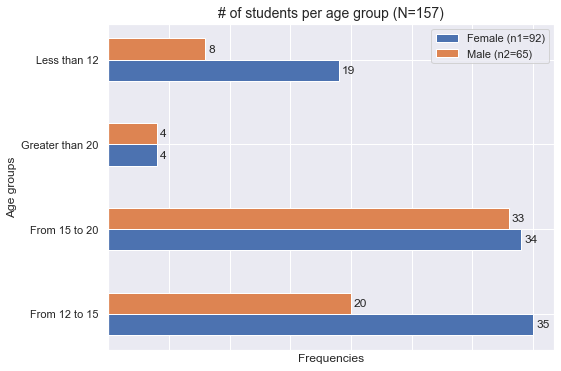

In [17]:
# Fixing random state for reproducibility
sns.set(rc={'figure.figsize':(8,6)})
fig, ax = plt.subplots()

ax1 = ax

title_fontsize = 14
label_fontsize = 12

#Plot Students
s_y_pos = np.arange(len(s_ages_interval))
s_rects_f = ax1.barh(s_y_pos - width/2, s_women_ages_values, width, align='center', label=f'Female (n1=%s)' % int(sum(s_women_ages_values)))
s_rects_m = ax1.barh(s_y_pos + width/2, s_men_ages_values, width, align='center', label=f'Male (n2=%s)' % int(sum(s_men_ages_values)))
ax1.legend()
ax1.set_yticks(s_y_pos)
ax1.set_yticklabels(s_ages_interval)
ax1.set_title('# of students per age group (N=%s)' % int(sum(s_women_ages_values) + sum(s_men_ages_values)), fontsize=title_fontsize)
ax1.set_ylabel('Age groups', fontsize=label_fontsize)
ax1.set_xlabel('Frequencies', fontsize=label_fontsize)
ax1.bar_label(s_rects_f, padding=3)
ax1.bar_label(s_rects_m, padding=3)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.savefig('../figs/s_ages_interval.png',dpi=250,bbox_inches = 'tight')
plt.show()

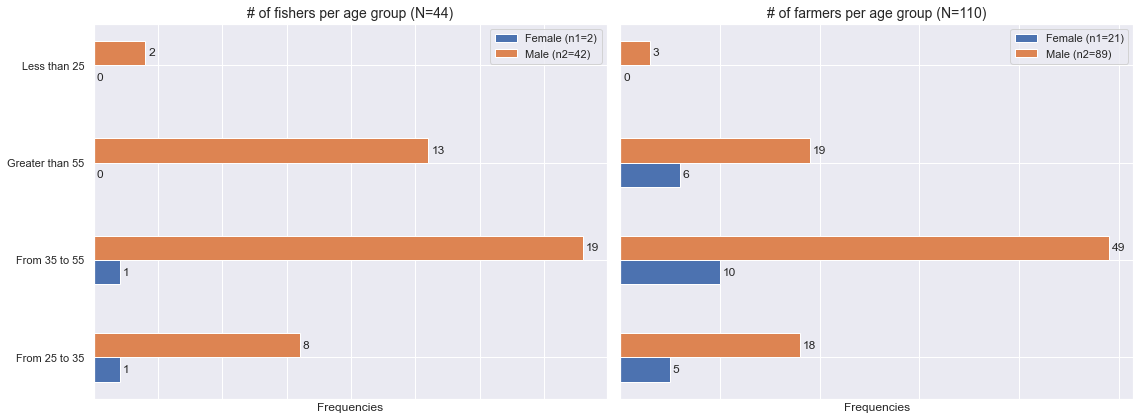

In [18]:
# Fixing random state for reproducibility

sns.set(rc={'figure.figsize':(16,6)})
fig, ax = plt.subplots(1, 2, sharey=True)
#width = 0.25

ax2 = ax[0]
ax3 = ax[1]

#Plot Fishers
fi_y_pos = np.arange(len(fi_ages_interval))
fi_rects_f = ax2.barh(fi_y_pos - width/2, fi_women_ages_values, width, align='center', label=f'Female (n1=%s)' % int(sum(fi_women_ages_values)))
fi_rects_m = ax2.barh(fi_y_pos + width/2, fi_men_ages_values, width, align='center', label=f'Male (n2=%s)' % int(sum(fi_men_ages_values)))
ax2.legend()
ax2.set_yticks(fi_y_pos)
ax2.set_yticklabels(fi_ages_interval)
ax2.set_title('# of fishers per age group (N=%s)' % int(sum(fi_women_ages_values) + sum(fi_men_ages_values)), fontsize=title_fontsize)
#ax2.set_ylabel('Age groups')
ax2.set_xlabel('Frequencies', fontsize=label_fontsize)
ax2.bar_label(fi_rects_f, padding=3)
ax2.bar_label(fi_rects_m, padding=3)
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


#Plot Fishers
fa_y_pos = np.arange(len(fa_ages_interval))
fa_rects_f = ax3.barh(fa_y_pos - width/2, fa_women_ages_values, width, align='center', label=f'Female (n1=%s)' % int(sum(fa_women_ages_values)))
fa_rects_m = ax3.barh(fa_y_pos + width/2, fa_men_ages_values, width, align='center', label=f'Male (n2=%s)' % int(sum(fa_men_ages_values)))
ax3.legend()
ax3.set_yticks(fa_y_pos)
ax3.set_yticklabels(fa_ages_interval)
ax3.set_title('# of farmers per age group (N=%s)' % int(sum(fa_women_ages_values) + sum(fa_men_ages_values)), fontsize=title_fontsize)
#ax2.set_ylabel('Age groups')
ax3.set_xlabel('Frequencies', fontsize=label_fontsize)
ax3.bar_label(fa_rects_f, padding=3)
ax3.bar_label(fa_rects_m, padding=3)
ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

fig.tight_layout()
plt.savefig('../figs/fi_fa_ages_interval.png',dpi=250,bbox_inches = 'tight')
plt.show()

In [19]:
v = get_percent(s_df_f.shape[0], s_df.shape[0])

v1 = get_percent(s_df_m.shape[0], s_df.shape[0])

print("Percent student female %.2f" % v + '%.')
print("Percent student male %.2f" % v1 + '%.')

print("Total student  %s" % s_df.shape[0])


Percent student female 58.60%.
Percent student male 41.40%.
Total student  157


In [20]:
v = get_percent(fi_df_f.shape[0], fi_df.shape[0])

v1 = get_percent(fi_df_m.shape[0], fi_df.shape[0])

print("Percent fisher female %.2f" % v + '%.')
print("Percent fisher male %.2f" % v1 + '%.')

print("Total fishers  %s" % fi_df.shape[0])


Percent fisher female 4.55%.
Percent fisher male 95.45%.
Total fishers  44


In [21]:
v = get_percent(fa_df_f.shape[0], fa_df.shape[0])

v1 = get_percent(fa_df_m.shape[0], fa_df.shape[0])

print("Percent farmers female %.2f" % v + '%.')
print("Percent famers male %.2f" % v1 + '%.')

print("Total farmers  %s" % fa_df.shape[0])

Percent farmers female 18.92%.
Percent famers male 80.18%.
Total farmers  111


In [22]:
total_f = s_df_f.shape[0] + fi_df_f.shape[0] + fa_df_f.shape[0]
total_m = s_df_m.shape[0] + fi_df_m.shape[0] + fa_df_m.shape[0]
total_r = s_df.shape[0] + fi_df.shape[0] + fa_df.shape[0]

v = get_percent(total_f, total_r)

v1 = get_percent(total_m, total_r)

print("Percent female %.2f" % v + '%.')
print("Percent male %.2f" % v1 + '%.')

print("Total  %s" % total_r)

Percent female 36.86%.
Percent male 62.82%.
Total  312


In [23]:
s_ed_df = count_freq_simple_answer(s_df, 'Education level')
s_ed_df_f = count_freq_simple_answer(s_df_f, 'Education level')
s_ed_df_m = count_freq_simple_answer(s_df_m, 'Education level')
s_men_ed_values = None
s_women_ed_values = None

if s_ed_df_m.shape[0] >= s_ed_df_f.shape[0]:  
    s_ed_df = merge_match_size(s_ed_df_m, s_ed_df_f, 'response').sort_values(by='response')
    s_men_ed_values = list(s_ed_df["frequency_x"])
    s_women_ed_values = list(s_ed_df["frequency_y"])
else:
    s_ed_df = merge_match_size(s_ed_df_f, s_ed_df_m, 'response').sort_values(by='response')
    s_women_ed_values = list(s_ed_df["frequency_x"])
    s_men_ed_values = list(s_ed_df["frequency_y"])
    
s_ed_level = list(s_ed_df["response"])

def docs():
    """
    print("Overall")
    print(s_ed_def)
    print("Female")
    print(s_ed_def_f)
    print("Male")
    print(s_ed_def_m)
    """
    pass

In [24]:
fi_ed_df = count_freq_simple_answer(fi_df, 'Education level')
fi_ed_df_f = count_freq_simple_answer(fi_df_f, 'Education level')
fi_ed_df_m = count_freq_simple_answer(fi_df_m, 'Education level')

fi_men_ed_values = None
fi_women_ed_values = None

if fi_ed_df_m.shape[0] >= fi_ed_df_f.shape[0]:  
    fi_ed_df = merge_match_size(fi_ed_df_m, fi_ed_df_f, 'response').sort_values(by='response')
    fi_men_ed_values = list(fi_ed_df["frequency_x"])
    fi_women_ed_values = list(fi_ed_df["frequency_y"])
else:
    fi_ed_df = merge_match_size(fi_ed_df_f, fi_ed_df_m, 'response').sort_values(by='response')
    fi_women_ed_values = list(fi_ed_df["frequency_x"])
    fi_men_ed_values = list(fi_ed_df["frequency_y"])
    
fi_ed_level = list(fi_ed_df["response"])


def docs():
    
    """
    print("Overall")
    print(fi_ed_def)
    print("Female")
    print(fi_ed_def_f)
    print("Male")
    print(fi_ed_def_m)
    """
    pass

In [25]:
fa_ed_df = count_freq_simple_answer(fa_df, 'Education level').dropna()
fa_ed_df_f = count_freq_simple_answer(fa_df_f, 'Education level')
fa_ed_df_m = count_freq_simple_answer(fa_df_m, 'Education level')

fa_men_ed_values = None
fa_women_ed_values = None

if fa_ed_df_m.shape[0] >= fa_ed_df_f.shape[0]:  
    fa_ed_df = merge_match_size(fa_ed_df_m, fa_ed_df_f, 'response').sort_values(by='response')
    fa_men_ed_values = list(fa_ed_df["frequency_x"])
    fa_women_ed_values = list(fa_ed_df["frequency_y"])
else:
    fa_ed_df = merge_match_size(fa_ed_df_f, fa_ed_df_m, 'response').sort_values(by='response')
    fa_women_ed_values = list(fa_ed_df["frequency_x"])
    fa_men_ed_values = list(fa_ed_df["frequency_y"])
    
fa_ed_level = list(fa_ed_df["response"])

def docs():
    """
    print("Overall")
    print(fa_ed_def)
    print("Female")
    print(fa_ed_def_f)
    print("Male")
    print(fa_ed_def_m)
    """
    pass

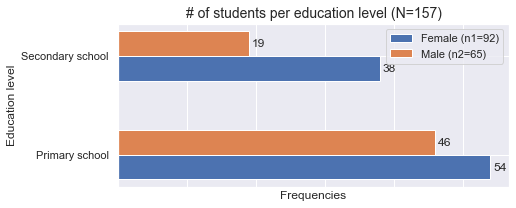

In [26]:
# Fixing random state for reproducibility
sns.set(rc={'figure.figsize':(7,3)})
fig, ax = plt.subplots()

ax1 = ax

#Plot Students
s_y_pos = np.arange(len(s_ed_level))
s_rects_f = ax1.barh(s_y_pos - width/2, s_women_ed_values, width, align='center', label=f'Female (n1=%s)' % int(sum(s_women_ed_values)))
s_rects_m = ax1.barh(s_y_pos + width/2, s_men_ed_values, width, align='center', label=f'Male (n2=%s)' % int(sum(s_men_ed_values)))

ax1.legend()
ax1.set_yticks(s_y_pos)
ax1.set_yticklabels(s_ed_level)
ax1.set_title('# of students per education level (N=%s)' % int(sum(s_women_ed_values) + sum(s_men_ed_values)), fontsize=title_fontsize)
ax1.set_ylabel('Education level', fontsize=label_fontsize)
ax1.set_xlabel('Frequencies', fontsize=label_fontsize)
ax1.bar_label(s_rects_f, padding=3)
ax1.bar_label(s_rects_m, padding=3)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.savefig('../figs/s_ed_level.png',dpi=250,bbox_inches = 'tight')
plt.show()

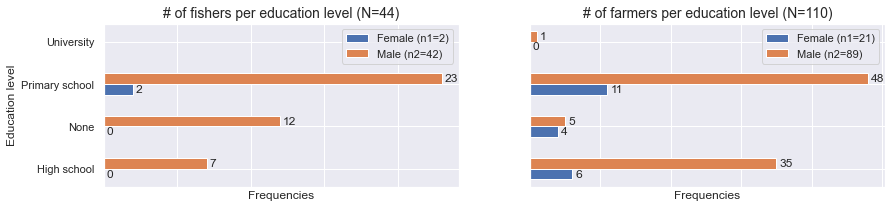

In [27]:
# Fixing random state for reproducibility
sns.set(rc={'figure.figsize':(14,3)})
fig, ax = plt.subplots(1, 2, sharey=True)

ax1 = ax[0]
ax2 = ax[1]

#Plot Students
fi_y_pos = np.arange(len(fi_ed_level))
fi_rects_f = ax1.barh(fi_y_pos - width/2, fi_women_ed_values, width, align='center', label=f'Female (n1=%s)' % int(sum(fi_women_ed_values)))
fi_rects_m = ax1.barh(fi_y_pos + width/2, fi_men_ed_values, width, align='center', label=f'Male (n2=%s)' % int(sum(fi_men_ed_values)))

ax1.legend()
ax1.set_yticks(fi_y_pos)
ax1.set_yticklabels(fi_ed_level)
ax1.set_title('# of fishers per education level (N=%s)' % int(sum(fi_women_ed_values) + sum(fi_men_ed_values)), fontsize=title_fontsize)
ax1.set_ylabel('Education level', fontsize=label_fontsize)
ax1.set_xlabel('Frequencies', fontsize=label_fontsize)
ax1.bar_label(fi_rects_f, padding=3)
ax1.bar_label(fi_rects_m, padding=3)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

#Plot Students
fa_y_pos = np.arange(len(fa_ed_level))
fa_rects_f = ax2.barh(fa_y_pos - width/2, fa_women_ed_values, width, align='center', label=f'Female (n1=%s)' % int(sum(fa_women_ed_values)))
fa_rects_m = ax2.barh(fa_y_pos + width/2, fa_men_ed_values, width, align='center', label=f'Male (n2=%s)' % int(sum(fa_men_ed_values)))

ax2.legend()
ax2.set_yticks(fa_y_pos)
ax2.set_yticklabels(fa_ed_level)
ax2.set_title('# of farmers per education level (N=%s)' % int(sum(fa_women_ed_values) + sum(fa_men_ed_values)), fontsize=title_fontsize)
#ax2.set_ylabel('Education level', fontsize=label_fontsize)
ax2.set_xlabel('Frequencies', fontsize=label_fontsize)
ax2.bar_label(fa_rects_f, padding=3)
ax2.bar_label(fa_rects_m, padding=3)
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


plt.savefig('../figs/fa_fi_ed_level.png',dpi=250,bbox_inches = 'tight')
plt.show()

# % of project beneficiaries (farmers, fishers, and school aged youths) demonstrated understanding of mangrove ecosystems protection practices.

## % of students demonstrated understanding of mangrove ecosystems protection practices

In [28]:
title_fontsize = 16
label_fontsize = 13

In [29]:
patterns = ["Don't know", "Spaces where there are trees", "Rivers, water springs", "The sea", "Spaces where live the animals", "Spaces where people live", "Schools and classooms", "The sky", "Other"]
col_name = "What is environment?"

s_environment_knowledge_df_p = count_freq_multiple_answer(s_df, col_name, patterns)
s_environment_knowledge_df_m = count_freq_multiple_answer(s_df_m, col_name, patterns)
s_environment_knowledge_df_f = count_freq_multiple_answer(s_df_f, col_name, patterns)
n_total = s_df[[col_name]].dropna()[col_name].count()
n_male = s_df_m[[col_name]].dropna()[col_name].count()
n_female = s_df_f[[col_name]].dropna()[col_name].count()

In [30]:
# Fixing random state for reproducibility
#s_environment_knowledge_df_p.plot.barh()

In [31]:
s_men_k_values = None
s_women_k_values = None

if s_environment_knowledge_df_m.shape[0] >= s_environment_knowledge_df_f.shape[0]:  
    s_environment_knowledge_df = merge_match_size(s_environment_knowledge_df_m, s_environment_knowledge_df_f, 'response').sort_values(by='response')
    s_men_k_values = list(s_environment_knowledge_df["frequency_x"])
    s_women_k_values = list(s_environment_knowledge_df["frequency_y"])
else:
    s_environment_knowledge_df = merge_match_size(s_environment_knowledge_df_f, s_environment_knowledge_df_m, 'response').sort_values(by='response')
    s_women_k_values = list(s_environment_knowledge_df["frequency_x"])
    s_men_k_values = list(s_environment_knowledge_df["frequency_y"])
    
s_environment_knowledge_df_label = list(s_environment_knowledge_df["response"])

In [32]:
#s_environment_knowledge_df_label

In [33]:
#s_women_k_values

In [34]:
#s_men_k_values

In [35]:
#s_environment_knowledge_df

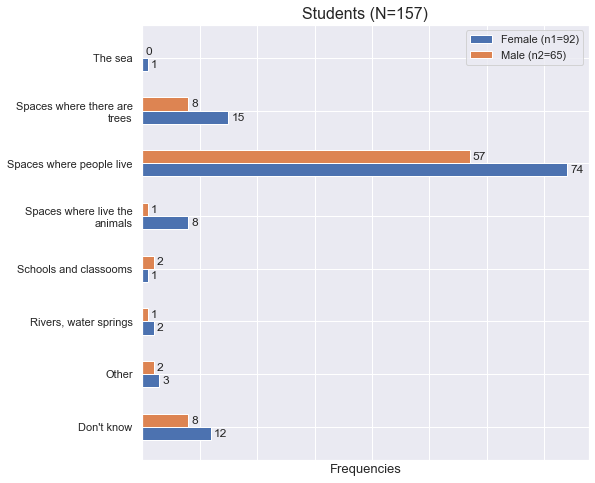

In [36]:
# Fixing random state for reproducibility
sns.set(rc={'figure.figsize':(8,8)})
fig, ax = plt.subplots()

ax1 = ax

#Plot Students
s_y_pos = np.arange(len(s_environment_knowledge_df_label))
s_rects_f = ax1.barh(s_y_pos - width/2, s_women_k_values, width, align='center', label=f'Female (n1=%s)' % n_female)
s_rects_m = ax1.barh(s_y_pos + width/2, s_men_k_values, width, align='center', label=f'Male (n2=%s)' % n_male)

ax1.legend()
ax1.set_yticks(s_y_pos)
ax1.set_yticklabels(s_environment_knowledge_df_label)
ax1.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax1.get_yticklabels())
ax1.set_title('Students (N=%s)' % n_total, fontsize=title_fontsize)
#ax1.set_ylabel('Education level', fontsize=label_fontsize)
ax1.set_xlabel('Frequencies', fontsize=label_fontsize)
ax1.bar_label(s_rects_f, padding=3)
ax1.bar_label(s_rects_m, padding=3)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.savefig('../figs/s_environment_knowledge_df.png',dpi=250,bbox_inches = 'tight')
plt.show()

In [37]:
patterns = ["Don't know", "The environment must be clean", "WE must protect the trees", "We must plant trees, mostly in the mountains", "We must not throw garbages in the mangroves, in the streets, in the rivers and at the sea", "Other"]
col_name = "How should the environment be for us to be in good health?"
title_grid_1 = "How should the environment be for us to be in good health?"
environment_knowledge1_df_p = count_freq_multiple_answer(s_df, col_name, patterns)
s_environment_knowledge1_df_m = count_freq_multiple_answer(s_df_m, col_name, patterns)
s_environment_knowledge1_df_f = count_freq_multiple_answer(s_df_f, col_name, patterns)

n_total1 = s_df[[col_name]].dropna()[col_name].count()
n_male1 = s_df_m[[col_name]].dropna()[col_name].count()
n_female1 = s_df_f[[col_name]].dropna()[col_name].count()

In [38]:
s_men_k1_values = None
s_women_k1_values = None

if s_environment_knowledge1_df_m.shape[0] >= s_environment_knowledge1_df_f.shape[0]:  
    s_environment_knowledge_df1 = merge_match_size(s_environment_knowledge1_df_m, s_environment_knowledge1_df_f, 'response').sort_values(by='response')
    s_men_k1_values = list(s_environment_knowledge_df1["frequency_x"])
    s_women_k1_values = list(s_environment_knowledge_df1["frequency_y"])
else:
    s_environment_knowledge_df1 = merge_match_size(s_environment_knowledge1_df_f, s_environment_knowledge1_df_m, 'response').sort_values(by='response')
    s_women_k1_values = list(s_environment_knowledge_df1["frequency_x"])
    s_men_k1_values = list(s_environment_knowledge_df1["frequency_y"])
    
s_environment_knowledge1_df_label = list(s_environment_knowledge_df1["response"])

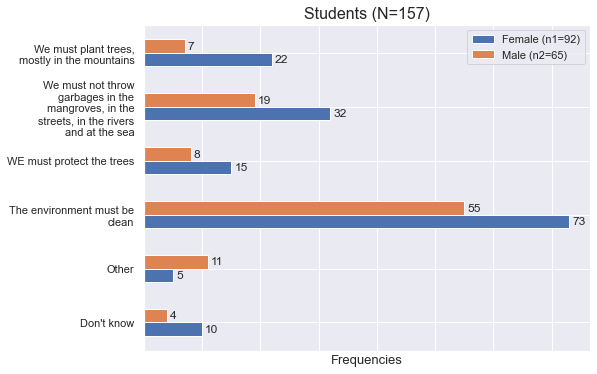

In [39]:
# Fixing random state for reproducibility
sns.set(rc={'figure.figsize':(8,6)})
fig, ax = plt.subplots()

ax1 = ax

#Plot Students
s_y_pos = np.arange(len(s_environment_knowledge1_df_label))
s_rects_f = ax1.barh(s_y_pos - width/2, s_women_k1_values, width, align='center', label=f'Female (n1=%s)' % n_female1)
s_rects_m = ax1.barh(s_y_pos + width/2, s_men_k1_values, width, align='center', label=f'Male (n2=%s)' % n_male1)

ax1.legend()
ax1.set_yticks(s_y_pos)
ax1.set_yticklabels(s_environment_knowledge1_df_label)
ax1.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax1.get_yticklabels())
ax1.set_title('Students (N=%s)' % n_total1, fontsize=title_fontsize)
#ax1.set_ylabel('Education level', fontsize=label_fontsize)
ax1.set_xlabel('Frequencies', fontsize=label_fontsize)
ax1.bar_label(s_rects_f, padding=3)
ax1.bar_label(s_rects_m, padding=3)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.savefig('../figs/s_environment_knowledge1_df.png',dpi=250,bbox_inches = 'tight')
plt.show()

In [40]:
patterns = ["Don't know", "Increase in the temperature of the atmosphere due to the emission of heating gases from human activities", "When the crops give nothing to harvest", "When the sun raises at midnight", "Other"]
col_name = "What is climate change?"
title_grid_2 = "What is climate change?"
environment_knowledge2_df_p = count_freq_multiple_answer(s_df, col_name, patterns)
s_environment_knowledge2_df_m = count_freq_multiple_answer(s_df_m, col_name, patterns)
s_environment_knowledge2_df_f = count_freq_multiple_answer(s_df_f, col_name, patterns)

n_total2 = s_df[[col_name]].dropna()[col_name].count()
n_male2 = s_df_m[[col_name]].dropna()[col_name].count()
n_female2 = s_df_f[[col_name]].dropna()[col_name].count()

In [41]:
s_men_k2_values = None
s_women_k2_values = None

if s_environment_knowledge2_df_m.shape[0] >= s_environment_knowledge2_df_f.shape[0]:  
    s_environment_knowledge2_df = merge_match_size(s_environment_knowledge2_df_m, s_environment_knowledge2_df_f, 'response').sort_values(by='response')
    s_men_k2_values = list(s_environment_knowledge2_df["frequency_x"])
    s_women_k2_values = list(s_environment_knowledge2_df["frequency_y"])
else:
    s_environment_knowledge2_df = merge_match_size(s_environment_knowledge2_df_f, s_environment_knowledge2_df_m, 'response').sort_values(by='response')
    s_women_k2_values = list(s_environment_knowledge2_df["frequency_x"])
    s_men_k2_values = list(s_environment_knowledge2_df["frequency_y"])
    
s_environment_knowledge2_df_label = list(s_environment_knowledge2_df["response"])

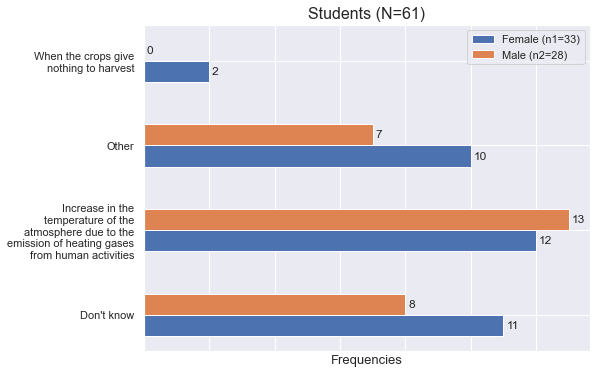

In [42]:
# Fixing random state for reproducibility
sns.set(rc={'figure.figsize':(8,6)})
fig, ax = plt.subplots()

ax1 = ax

#Plot Students
s_y_pos = np.arange(len(s_environment_knowledge2_df_label))
s_rects_f = ax1.barh(s_y_pos - width/2, s_women_k2_values, width, align='center', label=f'Female (n1=%s)' % n_female2)
s_rects_m = ax1.barh(s_y_pos + width/2, s_men_k2_values, width, align='center', label=f'Male (n2=%s)' % n_male2)

ax1.legend()
ax1.set_yticks(s_y_pos)
ax1.set_yticklabels(s_environment_knowledge2_df_label)
ax1.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax1.get_yticklabels())
ax1.set_title('Students (N=%s)' % n_total2, fontsize=title_fontsize)
#ax1.set_ylabel('Education level', fontsize=label_fontsize)
ax1.set_xlabel('Frequencies', fontsize=label_fontsize)
ax1.bar_label(s_rects_f, padding=3)
ax1.bar_label(s_rects_m, padding=3)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.savefig('../figs/s_environment_knowledge2_df.png',dpi=250,bbox_inches = 'tight')
plt.show()

In [43]:
patterns = ["Don't know", "CO2", "Oxygen", "Other"]
col_name = "Main heating gaz you know?"
title_grid_3 = "Main heating gaz you know?"
environment_knowledge3_df = count_freq_multiple_answer(s_df, col_name, patterns)
s_environment_knowledge3_df_m = count_freq_multiple_answer(s_df_m, col_name, patterns)
s_environment_knowledge3_df_f = count_freq_multiple_answer(s_df_f, col_name, patterns)
n_total3 = s_df[[col_name]].dropna()[col_name].count()
n_male3 = s_df_m[[col_name]].dropna()[col_name].count()
n_female3 = s_df_f[[col_name]].dropna()[col_name].count()

In [44]:
s_men_k3_values = None
s_women_k3_values = None

if s_environment_knowledge3_df_m.shape[0] >= s_environment_knowledge3_df_f.shape[0]:  
    s_environment_knowledge3_df = merge_match_size(s_environment_knowledge3_df_m, s_environment_knowledge3_df_f, 'response').sort_values(by='response')
    s_men_k3_values = list(s_environment_knowledge3_df["frequency_x"])
    s_women_k3_values = list(s_environment_knowledge3_df["frequency_y"])
else:
    s_environment_knowledge3_df = merge_match_size(s_environment_knowledge3_df_f, s_environment_knowledge3_df_m, 'response').sort_values(by='response')
    s_women_k3_values = list(s_environment_knowledge3_df["frequency_x"])
    s_men_k3_values = list(s_environment_knowledge3_df["frequency_y"])
    
s_environment_knowledge3_df_label = list(s_environment_knowledge3_df["response"])

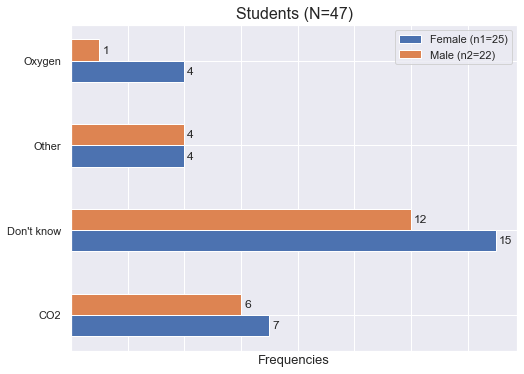

In [45]:
# Fixing random state for reproducibility
sns.set(rc={'figure.figsize':(8,6)})
fig, ax = plt.subplots()

ax1 = ax

#Plot Students
s_y_pos = np.arange(len(s_environment_knowledge3_df_label))
s_rects_f = ax1.barh(s_y_pos - width/2, s_women_k3_values, width, align='center', label=f'Female (n1=%s)' % n_female3)
s_rects_m = ax1.barh(s_y_pos + width/2, s_men_k3_values, width, align='center', label=f'Male (n2=%s)' % n_male3)

ax1.legend()
ax1.set_yticks(s_y_pos)
ax1.set_yticklabels(s_environment_knowledge3_df_label)
ax1.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax1.get_yticklabels())
ax1.set_title('Students (N=%s)' % n_total3, fontsize=title_fontsize)
#ax1.set_ylabel('Education level', fontsize=label_fontsize)
ax1.set_xlabel('Frequencies', fontsize=label_fontsize)
ax1.bar_label(s_rects_f, padding=3)
ax1.bar_label(s_rects_m, padding=3)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.savefig('../figs/s_environment_knowledge3_df.png',dpi=250,bbox_inches = 'tight')
plt.show()

In [46]:
patterns = ["Don't know", "Vehicles that run with fossil energies", "Increase in animal breeding and use of fertilizers", "The industries","Deforestation", "Other"]
col_name = "What produces heating gaz?"
title_grid_4 = "What produces heating gaz?"
environment_knowledge4_df = count_freq_multiple_answer(s_df, col_name, patterns)
s_environment_knowledge4_df_m = count_freq_multiple_answer(s_df_m, col_name, patterns)
s_environment_knowledge4_df_f = count_freq_multiple_answer(s_df_f, col_name, patterns)
n_total4 = s_df[[col_name]].dropna()[col_name].count()
n_male4 = s_df_m[[col_name]].dropna()[col_name].count()
n_female4 = s_df_f[[col_name]].dropna()[col_name].count()

In [47]:
s_men_k4_values = None
s_women_k4_values = None

if s_environment_knowledge4_df_m.shape[0] >= s_environment_knowledge4_df_f.shape[0]:  
    s_environment_knowledge4_df = merge_match_size(s_environment_knowledge4_df_m, s_environment_knowledge4_df_f, 'response').sort_values(by='response')
    s_men_k4_values = list(s_environment_knowledge4_df["frequency_x"])
    s_women_k4_values = list(s_environment_knowledge4_df["frequency_y"])
else:
    s_environment_knowledge4_df = merge_match_size(s_environment_knowledge4_df_f, s_environment_knowledge4_df_m, 'response').sort_values(by='response')
    s_women_k4_values = list(s_environment_knowledge4_df["frequency_x"])
    s_men_k4_values = list(s_environment_knowledge4_df["frequency_y"])
    
s_environment_knowledge4_df_label = list(s_environment_knowledge4_df["response"])

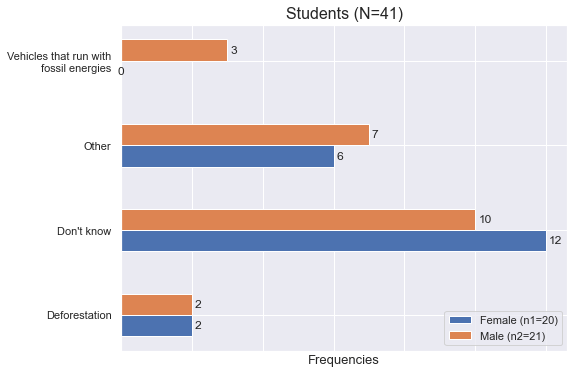

In [48]:
# Fixing random state for reproducibility
sns.set(rc={'figure.figsize':(8,6)})
fig, ax = plt.subplots()

ax1 = ax

#Plot Students
s_y_pos = np.arange(len(s_environment_knowledge4_df_label))
s_rects_f = ax1.barh(s_y_pos - width/2, s_women_k4_values, width, align='center', label=f'Female (n1=%s)' % n_female4)
s_rects_m = ax1.barh(s_y_pos + width/2, s_men_k4_values, width, align='center', label=f'Male (n2=%s)' % n_male4)

ax1.legend()
ax1.set_yticks(s_y_pos)
ax1.set_yticklabels(s_environment_knowledge4_df_label)
ax1.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax1.get_yticklabels())
ax1.set_title('Students (N=%s)' % n_total4, fontsize=title_fontsize)
#ax1.set_ylabel('Education level', fontsize=label_fontsize)
ax1.set_xlabel('Frequencies', fontsize=label_fontsize)
ax1.bar_label(s_rects_f, padding=3)
ax1.bar_label(s_rects_m, padding=3)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.savefig('../figs/s_environment_knowledge4_df.png',dpi=250,bbox_inches = 'tight')
plt.show()

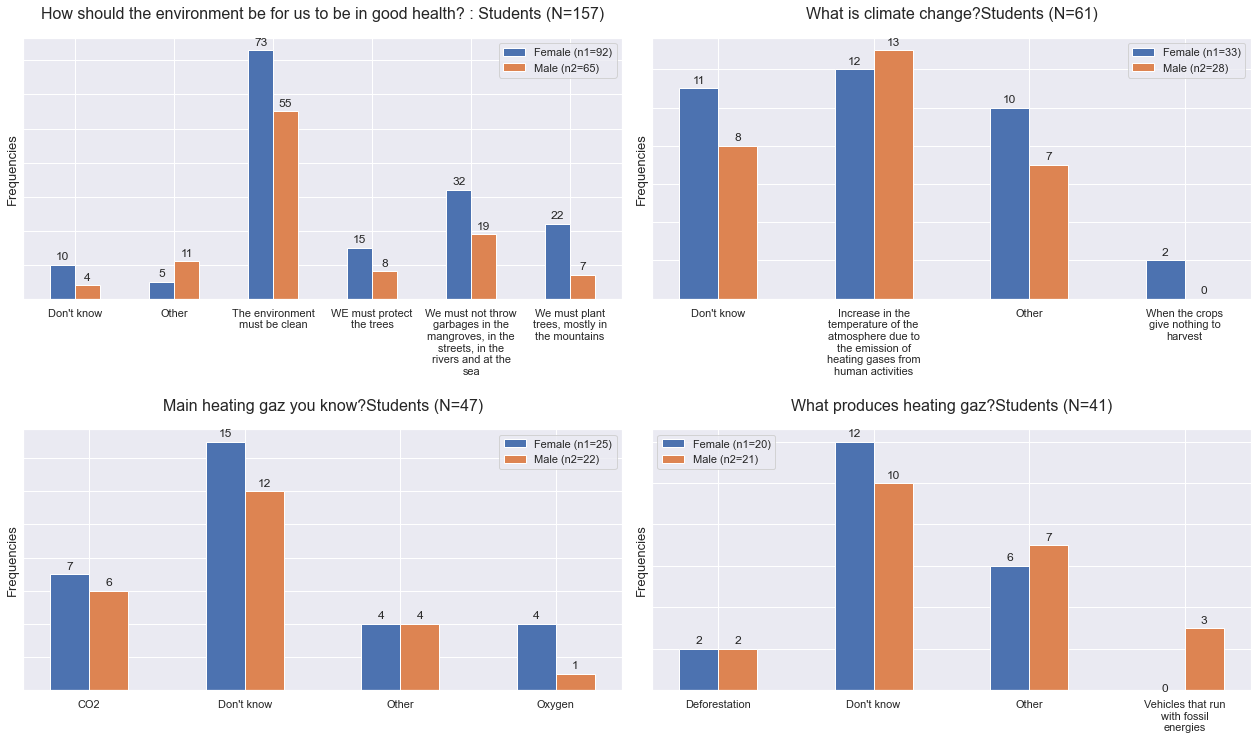

In [49]:
sns.set(rc={'figure.figsize':(22,12)})
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
#width = 0.20
#fig.tight_layout(pad=10.0)
fig.subplots_adjust(wspace=0.05, hspace=0.5)

max_width = 18
ax1 = ax[0, 0]
ax2 = ax[0, 1]
ax3 = ax[1, 0]
ax4 = ax[1, 1]
#Plot Students
s_y_pos = np.arange(len(s_environment_knowledge1_df_label))
s_rects_f = ax1.bar(s_y_pos - width/2, s_women_k1_values, width, align='center', label=f'Female (n1=%s)' % n_female1)
s_rects_m = ax1.bar(s_y_pos + width/2, s_men_k1_values, width, align='center', label=f'Male (n2=%s)' % n_male1)

ax1.legend()
ax1.set_xticks(s_y_pos)
ax1.set_xticklabels(s_environment_knowledge1_df_label)
ax1.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax1.get_xticklabels())
ax1.set_title(title_grid_1 + ' : Students (N=%s)' % n_total1, fontsize=title_fontsize, y=1.05)
#ax1.set_ylabel('Education level', fontsize=label_fontsize)
ax1.set_ylabel('Frequencies', fontsize=label_fontsize)
ax1.bar_label(s_rects_f, padding=3)
ax1.bar_label(s_rects_m, padding=3)
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False)



#Plot Students
s_y_pos0 = np.arange(len(s_environment_knowledge2_df_label))
s_rects_f = ax2.bar(s_y_pos0 - width/2, s_women_k2_values, width, align='center', label=f'Female (n1=%s)' % n_female2)
s_rects_m = ax2.bar(s_y_pos0 + width/2, s_men_k2_values, width, align='center', label=f'Male (n2=%s)' % n_male2)

ax2.legend()
ax2.set_xticks(s_y_pos0)
ax2.set_xticklabels(s_environment_knowledge2_df_label)
ax2.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax2.get_xticklabels())
ax2.set_title(title_grid_2 + 'Students (N=%s)' % n_total2, fontsize=title_fontsize, y=1.05)
#ax2.set_ylabel('Education level', fontsize=label_fontsize)
ax2.set_ylabel('Frequencies', fontsize=label_fontsize)
ax2.bar_label(s_rects_f, padding=3)
ax2.bar_label(s_rects_m, padding=3)
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False)


#Plot Students
s_y_pos1 = np.arange(len(s_environment_knowledge3_df_label))
s_rects_f = ax3.bar(s_y_pos1 - width/2, s_women_k3_values, width, align='center', label=f'Female (n1=%s)' % n_female3)
s_rects_m = ax3.bar(s_y_pos1 + width/2, s_men_k3_values, width, align='center', label=f'Male (n2=%s)' % n_male3)

ax3.legend()
ax3.set_xticks(s_y_pos1)
ax3.set_xticklabels(s_environment_knowledge3_df_label)
ax3.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax3.get_xticklabels())
ax3.set_title(title_grid_3 + 'Students (N=%s)' % n_total3, fontsize=title_fontsize, y=1.05)
#ax3.set_ylabel('Education level', fontsize=label_fontsize)
ax3.set_ylabel('Frequencies', fontsize=label_fontsize)
ax3.bar_label(s_rects_f, padding=3)
ax3.bar_label(s_rects_m, padding=3)
ax3.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False)



#Plot Students
s_y_pos2 = np.arange(len(s_environment_knowledge4_df_label))
s_rects_f = ax4.bar(s_y_pos2 - width/2, s_women_k4_values, width, align='center', label=f'Female (n1=%s)' % n_female4)
s_rects_m = ax4.bar(s_y_pos2 + width/2, s_men_k4_values, width, align='center', label=f'Male (n2=%s)' % n_male4)

ax4.legend()
ax4.set_xticks(s_y_pos2)
ax4.set_xticklabels(s_environment_knowledge4_df_label)
ax4.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax4.get_xticklabels())
ax4.set_title(title_grid_4 + 'Students (N=%s)' % n_total4, fontsize=title_fontsize, y=1.05)
#ax4.set_ylabel('Education level', fontsize=label_fontsize)
ax4.set_ylabel('Frequencies', fontsize=label_fontsize)
ax4.bar_label(s_rects_f, padding=3)
ax4.bar_label(s_rects_m, padding=3)
ax4.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False)

plt.savefig('../figs/s_environment_knowledge_total_df.png',dpi=250,bbox_inches = 'tight')

In [50]:
patterns = ["Don't know","It can cause issues in crops and in animal breeding", 
            "It occasions diseases for human being and animals", 
            "Increase in the earth temperature", 
            "Increase in the sea saltiness", 
            "There are more hurricane and they become more violent",
            "It causes drought",
            "It causes flooding", 
            "Other"]

col_name = "What are the consequencies of climate change?"

s_environment_knowledge5_df_p = count_freq_multiple_answer(s_df, col_name, patterns)
s_environment_knowledge5_df_m = count_freq_multiple_answer(s_df_m, col_name, patterns)
s_environment_knowledge5_df_f = count_freq_multiple_answer(s_df_f, col_name, patterns)
n_total5 = s_df[[col_name]].dropna()[col_name].count()
n_male5 = s_df_m[[col_name]].dropna()[col_name].count()
n_female5 = s_df_f[[col_name]].dropna()[col_name].count()

In [ ]:
s_men_k5_values = None
s_women_k5_values = None

if s_environment_knowledge5_df_m.shape[0] >= s_environment_knowledge5_df_f.shape[0]:  
    s_environment_knowledge5_df = merge_match_size(s_environment_knowledge5_df_m, s_environment_knowledge5_df_f, 'response').sort_values(by='response')
    s_men_k5_values = list(s_environment_knowledge5_df["frequency_x"])
    s_women_k5_values = list(s_environment_knowledge5_df["frequency_y"])
else:
    s_environment_knowledge5_df = merge_match_size(s_environment_knowledge5_df_f, s_environment_knowledge4_df_m, 'response').sort_values(by='response')
    s_women_k5_values = list(s_environment_knowledge5_df["frequency_x"])
    s_men_k5_values = list(s_environment_knowledge5_df["frequency_y"])
    
s_environment_knowledge5_df_label = list(s_environment_knowledge5_df["response"])